In [199]:
import numpy as np
import sys
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import os
pathorig = '/Users/raiziel/'
os.chdir(pathorig) 

In [223]:
# Initial Conditions
L1 = 1.0 # Pendulum rod length(m)
m1 = 1.0 # mass of pendulum bob (kg)
L2 = 1.0
m2 = 1.0
w = 1.0 # drive frequency(s-1)
A = 1.0 # drive amplitude(m)
g = 9.81 # gravity(m/s^2)
alpha = 0.0 # damping coefficient
Th1 = 3.4 #radians
Th2 = 3.4 #radians
y0 = np.array([Th1, 0, Th2, 0]) # Initial Conditions; theta, dtheta/dt : angle, angular velocity
tmax, dt = 30, 0.01 # Maximum Time, Time Point Spacing (s) 30 seconds
t = np.arange(0, tmax+dt, dt) # Time Grid(s)

# Small changes in intial conditions
dz = 1e-4  # change in ztheta
dw = .5   # change in drive frequency
dA = .5  # change in drive amplitude
dalpha = 0 # change in damping coefficient
zTh1= Th1+dz
zTh2 = Th2
z0 = np.array([zTh1, 0, zTh2, 0]) # Initial Conditions; ztheta, zdtheta/dt
w = w + dw
A = A + dA    
alpha = alpha + dalpha

In [236]:
# purpose of this function is to show the exponential growth in error between two conditioned pendulums
def Initial1(y,yprime):
    # Conditional to avoid ln(0) error and add a small value 
    if ((y-yprime).all()==0):
        plt.plot(np.log(np.abs(y-yprime)+0.0000001))
        plt.xlabel('time, t(s)')
        plt.ylabel('Δθ(t)')
        plt.title("Observation of sensitivity in θ ")
    
    else:
        plt.plot(np.log(np.abs(y-yprime)))
        plt.xlabel('time, t(s)')
        plt.ylabel('Δθ(t)')
        plt.title("Observation of sensitivity in θ ")

In [237]:
# purpose of this function is to show the exponential growth in error between two conditioned pendulums
def Initial2(y,yprime):
    # Conditional to avoid ln(0) error and add a small value 
    if ((y-yprime).all()==0):
        plt.plot(np.log(np.abs(y-yprime)+0.0000001))
        plt.xlabel('time, t(s)')
        plt.ylabel('angular velocity (radians/s)')
        plt.title("Observation of sensitivity in ω")
    
    else:
        plt.plot(np.log(np.abs(y-yprime)))
        plt.xlabel('time, t(s)')
        plt.ylabel('angular velocity (radians/s)')
        plt.title("Observation of sensitivity in ω")

In [238]:
def deriv1(y, t, L1, L2, m1, m2):
    """Return the first derivatives of y = theta1, z1, theta2, z2."""
    #initial conditions
    theta1, theta1dot, theta2, theta2dot = y
    deltatheta = (theta1-theta2)
    # cos(Δθ), sin(Δθ), cos(2Δθ), sin(Δθ)
    ct1 = np.cos(theta1) # cos(θ1)
    ct2 = np.cos(theta2) # cos(θ2)
    st1 = np.sin(theta1) # sin(θ1)
    st2 = np.sin(theta2) # sin(θ2)
    c1 = np.cos(deltatheta) # sin(Δθ)
    s1 = np.sin(deltatheta) # sin(Δθ)
    c2 = np.cos(2*deltatheta) # cos^2(Δθ)
    s2 = np.sin(2*deltatheta) # sin(2Δθ)
    s3 = np.sin(deltatheta)**2 # sin^2(Δθ)
    
    # Re-expressing dtheta1_dt / dtheta2_dt as variable z1,z2
    # Purpose of this is to set the problem as a 1st order ODE rather than 2nd order ODE
    
    #angular velocity
    z1 = theta1dot 
    z2 = theta2dot 
    #
    e1 = alpha*z1 - A*np.cos(w*t) #α alpha = k = damping coefficient for both
    e2 = alpha*z2 - A*np.cos(w*t) #β
    g1 = 2*e1-(2*e2*c1) # γ1
    g2 = 2*e1*np.cos(deltatheta)-((2*(m1+m2)*e2)/m2) # γ2
    
    z1dot = (m2*L1*(w**2)*s2+2*m2*L2*(w**2)*s1+2*g*m2*ct2*s1+2*g*m1*st1+g1)/(-2*L1*(m1+m2*s3))
    
    
    z2dot = (m2*L2*(w**2)*s2+2*(m1+m2)*L1*(w**2)*s1+2*g*(m1+m2)*ct1*s1 +g2)/(2*L2*(m1+m2*s3))
    
    return theta1dot, z1dot, theta2dot, z2dot



# Do the numerical integration of the equations of motion
y = odeint(deriv1, y0, t, args=(L1, L2, m1, m2))


# Unpack z and theta as a function of time
theta1, theta2 = y[:,0], y[:,2]

# Convert to Cartesian coordinates of the two bob positions.
x1 = L1 * np.sin(theta1)
y1 = -L1 * np.cos(theta1)
x2 = x1 + L2 * np.sin(theta2)
y2 = y1 - L2 * np.cos(theta2)



#plt.plot(y)
#plt.plot(x1,y1)
#plt.plot (x2,z2)
#plt.xlabel('time, t(s)')
#plt.ylabel('ΔΦ(t)')
#print(y[:,0])

In [239]:
def zderiv(z, t, L1, L2, m1, m2):
    """Return the first derivatives of z = theta1, z1, theta2, z2."""
    #initial conditions
    theta1, theta1dot, theta2, theta2dot = z
    deltatheta = (theta1-theta2)
    # cos(Δθ), sin(Δθ), cos(2Δθ), sin(Δθ)
    ct1 = np.cos(theta1) # cos(θ1)
    ct2 = np.cos(theta2) # cos(θ2)
    st1 = np.sin(theta1) # sin(θ1)
    st2 = np.sin(theta2) # sin(θ2)
    c1 = np.cos(deltatheta) # sin(Δθ)
    s1 = np.sin(deltatheta) # sin(Δθ)
    c2 = np.cos(2*deltatheta) # cos^2(Δθ)
    s2 = np.sin(2*deltatheta) # sin(2Δθ)
    s3 = np.sin(deltatheta)**2 # sin^2(Δθ)
    
    # Re-expressing dtheta1_dt / dtheta2_dt as variable z1,z2
    # Purpose of this is to set the problem as a 1st order ODE rather than 2nd order ODE
    z1 = theta1dot
    z2 = theta2dot
    #
    e1 = alpha*z1 - A*np.cos(w*t) #α alpha = k = damping coefficient for both
    e2 = alpha*z2 - A*np.cos(w*t) #β
    g1 = 2*e1-(2*e2*c1) # γ1
    g2 = 2*e1*np.cos(deltatheta)-((2*(m1+m2)*e2)/m2) # γ2
    
    z1dot = (m2*L1*(w**2)*s2+2*m2*L2*(w**2)*s1+2*g*m2*ct2*s1+2*g*m1*st1+g1)/(-2*L1*(m1+m2*s3))
    
    
    z2dot = (m2*L2*(w**2)*s2+2*(m1+m2)*L1*(w**2)*s1+2*g*(m1+m2)*ct1*s1 +g2)/(2*L2*(m1+m2*s3))
    
    return theta1dot, z1dot, theta2dot, z2dot


# Do the numerical integration of the equations of motion
z = odeint(zderiv, z0, t, args=(L1, L2, m1, m2))



# Unpack z and theta as a function of time
theta1, theta2 = z[:,0], z[:,2]

# Convert to Cartesian coordinates of the two bob positions.
x1 = L1 * np.sin(ztheta1)
z1 = -L1 * np.cos(ztheta1)
x2 = x1 + L2 * np.sin(ztheta2)
z2 = y1 - L2 * np.cos(ztheta2)

#plt.plot(z)
#plt.xlabel('time, t(s)')
#plt.ylabel('ΔΦ(t)')
#print(y[:,0])

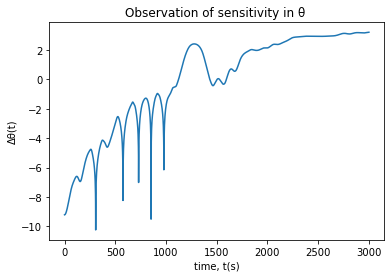

In [240]:
Initial1(y[:,0],z[:,0])

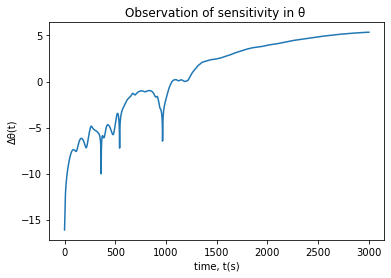

In [241]:
Initial1(y[:,2],z[:,2])

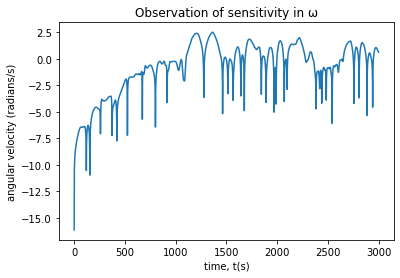

In [242]:
Initial2(y[:,1],z[:,1])

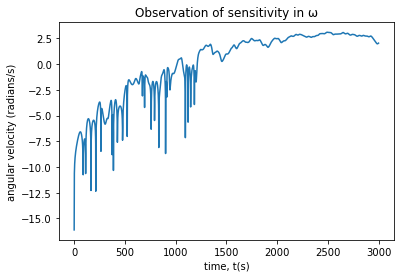

In [243]:
Initial2(y[:,3],z[:,3])


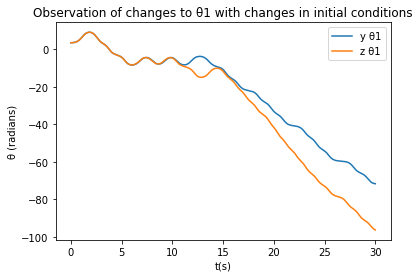

In [244]:
plt.plot (t,y[:,0],label='y θ1')
plt.plot (t,z[:,0],label='z θ1')
plt.xlabel("t(s)")
plt.ylabel("θ (radians)")
plt.title("Observation of changes to θ1 with changes in initial conditions")
plt.legend()

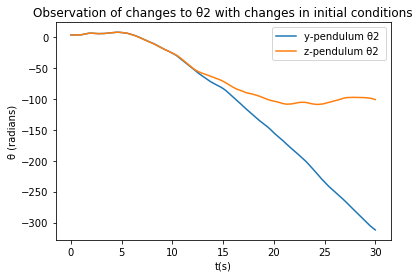

In [245]:
plt.plot (t,y[:,2],label='y-pendulum θ2' )
plt.plot (t,z[:,2],label='z-pendulum θ2 ')
plt.xlabel("t(s)")
plt.ylabel("θ (radians)")
plt.title("Observation of changes to θ2 with changes in initial conditions")
plt.legend()



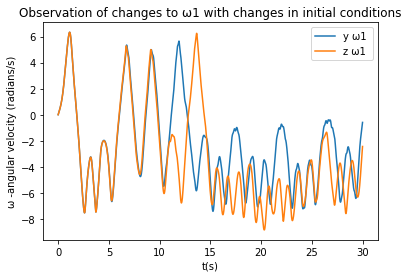

In [246]:
plt.plot (t,y[:,1],label='y ω1' )
plt.plot (t,z[:,1],label='z ω1 ')
plt.xlabel("t(s)")
plt.ylabel("ω -angular velocity (radians/s)")
plt.title("Observation of changes to ω1 with changes in initial conditions")
plt.legend()

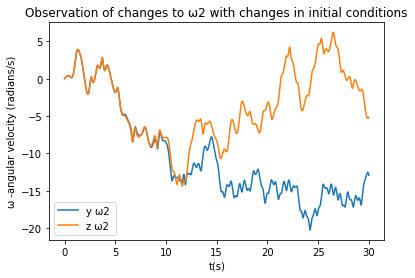

In [247]:
plt.plot (t,y[:,3],label='y ω2' )
plt.plot (t,z[:,3],label='z ω2 ')
plt.xlabel("t(s)")
plt.ylabel("ω -angular velocity (radians/s)")
plt.title("Observation of changes to ω2 with changes in initial conditions")
plt.legend()